# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
good_cities = []
lons = []
lats = []
humidity = []
temps = []
cloudiness = []
countries = []
times = []
wind_speeds = []
settings = {"units": "imperial", "appid": api_key}
print ("""
Beginning Data Retrieval     
-----------------------------
""")
for setNum in range(0, len(cities)//50 + 1):
    for recordNum in range(0, 50):
        try:
            city = cities[setNum*50 + recordNum]
        except IndexError:
            break
        try:
            weather_data =  owm.get_current(city, **settings)
            good_cities.append(city)
            lons.append(weather_data["coord"]["lon"])
            lats.append(weather_data["coord"]["lat"])
            humidity.append(weather_data["main"]["humidity"])
            temps.append(weather_data["main"]["temp"])
            cloudiness.append(weather_data["clouds"]["all"])
            wind_speeds.append(weather_data["wind"]["speed"])
            countries.append(weather_data["sys"]["country"])
            times.append(weather_data["dt"])
            print(f"Processing Record {recordNum + 1} in Set {setNum + 1} | {city}")
        except:
            print("City not found. Skipping...")
            
print ("""
-----------------------------
Data Retrieval Complete     
-----------------------------
""")


Beginning Data Retrieval     
-----------------------------

Processing Record 1 in Set 1 | airai
Processing Record 2 in Set 1 | champerico
City not found. Skipping...
Processing Record 4 in Set 1 | upernavik
Processing Record 5 in Set 1 | yellowknife
Processing Record 6 in Set 1 | viransehir
Processing Record 7 in Set 1 | faanui
Processing Record 8 in Set 1 | klaksvik
Processing Record 9 in Set 1 | santa marta
Processing Record 10 in Set 1 | rebra
Processing Record 11 in Set 1 | qaanaaq
City not found. Skipping...
Processing Record 13 in Set 1 | salalah
Processing Record 14 in Set 1 | lompoc
Processing Record 15 in Set 1 | te anau
Processing Record 16 in Set 1 | halifax
Processing Record 17 in Set 1 | los llanos de aridane
Processing Record 18 in Set 1 | albany
Processing Record 19 in Set 1 | atuona
Processing Record 20 in Set 1 | khatanga
Processing Record 21 in Set 1 | nikolskoye
Processing Record 22 in Set 1 | hailar
Processing Record 23 in Set 1 | punta arenas
Processing Record 2

Processing Record 9 in Set 5 | aswan
Processing Record 10 in Set 5 | hambantota
Processing Record 11 in Set 5 | barbastro
Processing Record 12 in Set 5 | saint stephen
City not found. Skipping...
Processing Record 14 in Set 5 | saint george
Processing Record 15 in Set 5 | les cayes
Processing Record 16 in Set 5 | sioux lookout
City not found. Skipping...
Processing Record 18 in Set 5 | lorengau
Processing Record 19 in Set 5 | pisco
Processing Record 20 in Set 5 | oistins
Processing Record 21 in Set 5 | lima
Processing Record 22 in Set 5 | tuatapere
Processing Record 23 in Set 5 | gari
Processing Record 24 in Set 5 | gairo
Processing Record 25 in Set 5 | methoni
Processing Record 26 in Set 5 | winschoten
Processing Record 27 in Set 5 | kenora
Processing Record 28 in Set 5 | paamiut
Processing Record 29 in Set 5 | vinh
City not found. Skipping...
Processing Record 31 in Set 5 | bandarbeyla
Processing Record 32 in Set 5 | ossora
Processing Record 33 in Set 5 | laguna
City not found. Skipp

City not found. Skipping...
Processing Record 20 in Set 9 | hervey bay
Processing Record 21 in Set 9 | alta floresta
Processing Record 22 in Set 9 | tyrma
Processing Record 23 in Set 9 | natal
Processing Record 24 in Set 9 | nuuk
Processing Record 25 in Set 9 | elizabeth city
Processing Record 26 in Set 9 | beatrice
Processing Record 27 in Set 9 | beidao
Processing Record 28 in Set 9 | herouville-saint-clair
Processing Record 29 in Set 9 | marsaxlokk
Processing Record 30 in Set 9 | lebyazhye
Processing Record 31 in Set 9 | vrangel
Processing Record 32 in Set 9 | petropavlovsk-kamchatskiy
Processing Record 33 in Set 9 | lieto
City not found. Skipping...
Processing Record 35 in Set 9 | maragogi
Processing Record 36 in Set 9 | tiznit
Processing Record 37 in Set 9 | saint anthony
Processing Record 38 in Set 9 | zhengjiatun
City not found. Skipping...
Processing Record 40 in Set 9 | cherskiy
Processing Record 41 in Set 9 | san jeronimito
Processing Record 42 in Set 9 | high prairie
Processi

Processing Record 20 in Set 13 | suluq
Processing Record 21 in Set 13 | polson
Processing Record 22 in Set 13 | springbok
Processing Record 23 in Set 13 | xuddur
Processing Record 24 in Set 13 | sinazongwe
Processing Record 25 in Set 13 | baykit
City not found. Skipping...
Processing Record 27 in Set 13 | bahar
Processing Record 28 in Set 13 | vila
City not found. Skipping...
Processing Record 30 in Set 13 | tura
Processing Record 31 in Set 13 | tsurugi
Processing Record 32 in Set 13 | stuttgart
Processing Record 33 in Set 13 | kharela
Processing Record 34 in Set 13 | aguacatan
Processing Record 35 in Set 13 | tautira
Processing Record 36 in Set 13 | kuandian
Processing Record 37 in Set 13 | taylorville
Processing Record 38 in Set 13 | sooke

-----------------------------
Data Retrieval Complete     
-----------------------------



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_df = pd.DataFrame({"City": good_cities,
                           "Country": countries,
                           "Date": times,
                           "Cloudiness": cloudiness,
                           "Humidity": humidity,
                           "Lat": lats,
                           "Lng": lons,
                           "Temperature (F)": temps,
                           "Wind Speed": wind_speeds})
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Temperature (F),Wind Speed
0,airai,TL,1553902687,8,87,-8.93,125.41,75.22,1.28
1,champerico,MX,1553899320,40,34,16.38,-93.60,93.20,12.75
2,upernavik,GL,1553902688,0,91,72.79,-56.15,8.98,9.66
3,yellowknife,CA,1553902375,90,73,62.45,-114.38,27.25,8.05
4,viransehir,TR,1553902688,100,99,37.24,39.76,48.85,7.31


In [55]:
weather_df.dtypes

City                object
Country             object
Date                 int64
Cloudiness           int64
Humidity             int64
Lat                float64
Lng                float64
Temperature (F)    float64
Wind Speed         float64
dtype: object

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Temperature (F),Wind Speed
135,paita,PE,1553896800,75,290,-5.09,-81.11,62.6,7.54


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

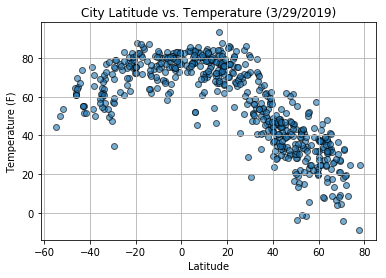

In [46]:
date_object = time.localtime(weather_df["Date"][0])
date = f"{date_object[1]}/{date_object[2]}/{date_object[0]}"
plt.scatter(weather_df["Lat"], weather_df["Temperature (F)"], edgecolors="k",
            alpha=0.6)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid()
plt.savefig("../output_data/City_Latitude_vs._Temperature.png")

#### Latitude vs. Humidity Plot

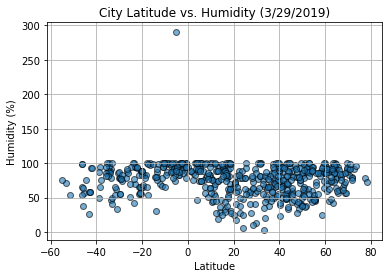

In [35]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors="k",
            alpha=0.6)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid()
#That doesn't look great

In [43]:
weather_df.loc[weather_df["Humidity"] > 100]

#Obviously something has gone wrong with the api response for Paita Peru
#so we are going to remove that single city that reported a humidity of 290%

cleaned_df = weather_df.loc[weather_df["Humidity"] <= 100]

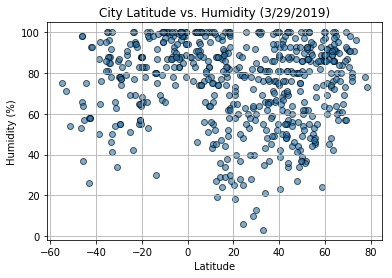

In [48]:
plt.scatter(cleaned_df["Lat"], cleaned_df["Humidity"], edgecolors="k",
            alpha=0.6)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid()
plt.savefig("../output_data/City_Latitude_vs._Humidity.png")

#### Latitude vs. Cloudiness Plot

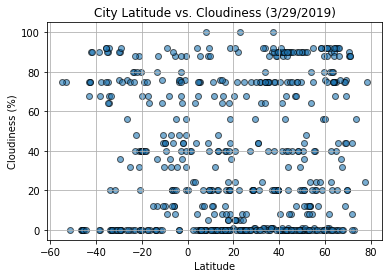

In [47]:
plt.scatter(cleaned_df["Lat"], cleaned_df["Cloudiness"], edgecolors="k",
            alpha=0.6)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid()
plt.savefig("../output_data/City_Latitude_vs._Cloudiness.png")

#### Latitude vs. Wind Speed Plot

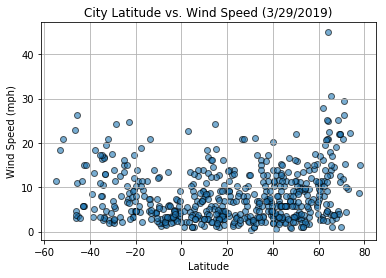

In [49]:
plt.scatter(cleaned_df["Lat"], cleaned_df["Wind Speed"], edgecolors="k",
            alpha=0.6)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid()
plt.savefig("../output_data/City_Latitude_vs._Wind_Speed.png")